# ASSIGNMENT2 STEREO VISION

## PART-A WRITTEN EXERCISE

**(a) Show that the perspective projection of a line in 3D is still a line on the image plane.**

Without loss of genearality, assume the image plane lies at $z=1$, which yield a standard perspective projection.

A line in 3D space can be represented as $p(\lambda) = p_0 + \lambda t$, where $p_0=(x_0, y_0, z_0), t=(t_x, t_y, t_z) \in R^3$, $\lambda \in R$. Its projection onto the image plane is

$$ q = \frac{(x_0 + \lambda t_x, y_0 + \lambda t_y)}{z_0 + \lambda t_z} = q_0 + \mu s $$

where

$$ \left\{
\begin{aligned}
q_0 & =  (\frac{x_0}{z_0}, \frac{y_0}{z_0}) \\
\mu & =  \frac{\lambda t_z}{z_0 + \lambda t_z}\\
s & =  (\frac{t_x}{t_z} - \frac{x_0}{z_0}, \frac{t_y}{t_z} - \frac{y_0}{z_0})
\end{aligned}
\right.
$$
which is still a line.

------

* How to solve $q_0$, $\mu$, and $s$?
 - Considering $(\frac{x_0}{z_0}, \frac{y_0}{z_0}) (i.e. \lambda = 0)$ and $(\frac{t_x}{t_z}, \frac{t_y}{t_z})(i.e. \lambda = \infty)$ are both on the projected line.
------

**(b) Show that, under perspective projection, the vanishing points of families of parallel lines that are on the same 3D plane lie on a single 2D line (or horizon) in image. See the figure below for illustration.**

![image.png](assets/hrz.png)

We can rewrite the parametric equation of projected line in (a) as
$$ q(\mu^\prime) = q_{\infty} + \mu^\prime s^\prime $$

where

$$ \left\{
\begin{aligned}
q_{\infty} & =  (\frac{t_x}{t_z}, \frac{t_y}{t_z}) \\
\mu^\prime & =  1 - \mu = \frac{z_0}{z_0 + \lambda t_z} \\
s^\prime & =  -s = ( \frac{x_0}{z_0} - \frac{t_x}{t_z}, \frac{y_0}{z_0} - \frac{t_y}{t_z})
\end{aligned}
\right.
$$

This implies, the projection of family of parallel lines $F(t) = \{ p(\lambda) = p_0 + \lambda t, p_0 \in R^3， \lambda \in R \mid t = (t_x, t_y, t_z) \}$ all pass through the same point, i.e. vanishing point, $q_{\infty}(t)$. 

Assume the normal vector of 3D plane is $n=(n_x, n_y, n_z)$. Then, the union set of vanishing points of families of parallel lines that are on this 3D plane is
$$
\begin{aligned}
\bigcup \{q_\infty (t) = (\frac{t_x}{t_z}, \frac{t_y}{t_z}) \mid n_x t_x + n_y t_y + n_z t_z = 0 \} = \{ (x, y) \mid n_x x + n_y y + n_z = 0 \}
\end{aligned}
$$

which is a 2D line. Specifically, it's the intersection line of the 3D planes those lines lie on and image plane.

----

* Why $\mu^\prime = 1 - \mu$, and $s^\prime  = -s$?

$$
\begin{equation}
\begin{split}
q_0 &= q_0 + \mu(q_\infty - q_0) \\
    &= \mu q_\infty + (1 - \mu)q_0 \\
    &\overset{ \mu^\prime \leftarrow 1 - \mu}{=} (1-\mu^\prime)  q_\infty + \mu^\prime q_0\\
    &= q_\infty + \mu^\prime (q_0 -  q_\infty)
\end{split}
\end{equation}
$$

----

**(c) Given the projection matrices of two stereo cameras and a pair of corresponding points (p and p’) on the image planes of two cameras, show the close-form solution for calculating the 3D scene point P that corresponds to the image points p and p’.**

For the first camera, we have
$$\bar{p} = \frac{M_1 \bar P}{e_3^T M_1 \bar P}$$

Here $\bar{p} = (p, 1)$, $\bar P = (P, 1)$

Similarly, for the second camera, we have
$$\bar{p^\prime} = \frac{M_2 \bar P}{e_3^T M_2 \bar P}$$

Hence, we have
$$ \left\{
\begin{aligned}
p_{x} & =  \frac{e_1^T M_1 \bar P}{e_3^T M_1 \bar P} \\
p_{y} & =  \frac{e_2^T M_1 \bar P}{e_3^T M_1 \bar P} \\
p_{x}^\prime & =  \frac{e_1^T M_2 \bar P}{e_3^T M_2 \bar P} \\
p_{y}^\prime & =  \frac{e_2^T M_2 \bar P}{e_3^T M_2 \bar P} \\
\end{aligned}
\right.
$$

by rearranging terms, we have

$$ \left\{
\begin{aligned}
(p_{x}e_3^T - e_1^T) M_1 \bar P & = 0\\
(p_{y}e_3^T - e_2^T) M_1 \bar P & = 0\\
(p_{x}^\prime e_3^T - e_1^T) M_2 \bar P & = 0\\
(p_{y}^\prime e_3^T - e_2^T) M_2 \bar P & = 0\\
\end{aligned}
\right.
$$

Denote $M = (M_1^T (p_x e_3 - e_1), M_1^T (p_y e_3 - e_2), M_2^T (p_{x}^\prime e_3 - e_1), M_2^T(p_{y}^\prime e_3 - e_1))^T $, $Q$ the matrix composed by first three colums of $M$ and $u$ the fourth column of $M$, i.e. $M = [Q, u]$, then

$$M \bar P = QP + u = 0 \quad (1)$$

Hence, the closed-form solution is $P = -(Q^T Q)^{-1} Q^T u$

----
* DISCUSSSION: equation (1) has unique solution if and only if $rank(Q)=3$, this should be equivalent to epipolar constraint. How to prove?

----

## PART-B: CODING

Given five stereo image pairs, you are required to write a program with OpenCV to:

* Reconstruct the disparity map
* Estimate the relative height of two objects (you may need to segment the objects, for example, using grabcut algorithm in OpenCV.)

For each image pair, show
- Epipolar lines of any four corresponding points (15%)
- Disparity map	(15%)


The remaining 30% of marks will depend on the accuracy of relative height estimation between two objects (ratio between the objects on the left and on the right in terms of their heights).

* Pair-1: Estimate the relative height of two traffic cones. (6%)
* Pair-2: Estimate the relative height of the green box (tea) and brown box. (6%)
* Pair-3: Estimate the relative height of two books. (6%)
* Pair-4: Estimate the relative height of two bottles. (6%)
* Pair-5: Estimate the relative height of the statue and the right stone. (6%)

In [1]:
!ls ./data

1_a.jpg  2_a.jpg  3_a.jpg  4_a.jpg  5_a.jpg
1_b.jpg  2_b.jpg  3_b.jpg  4_b.jpg  5_b.jpg


### B1. show epipolar lines

In [9]:
import os
from stereo_functions import get_fundamental_mat, get_sift_matches,\
                             drawlines, draw_epilines
import cv2

import numpy as np
import random

SEED=10086
np.random.seed(SEED)
random.seed(SEED)

import matplotlib.pyplot as plt

In [10]:
os.makedirs('results/epilines', exist_ok=True)

num_pts_draw = 4


for i in range(1, 6):
    left = cv2.imread(f'data/{i}_a.jpg')
    right = cv2.imread(f'data/{i}_b.jpg')
    pts1, pts2, _ = get_sift_matches(left, right)
    F, pts1_inliers, pts2_inliers = get_fundamental_mat(pts1, pts2)
    pts1_draw = pts1_inliers[:num_pts_draw]
    pts2_draw = pts2_inliers[:num_pts_draw]
    left_epi, right_epi = draw_epilines(left, right, pts1_draw, pts2_draw, F)
    
    cv2.imwrite(f'results/epilines/{i}_a_epilines.jpg', left_epi)
    cv2.imwrite(f'results/epilines/{i}_b_epilines.jpg', right_epi)


In [5]:
!ls results/epilines

1_a_epilines.jpg  2_b_epilines.jpg  4_a_epilines.jpg  5_b_epilines.jpg
1_b_epilines.jpg  3_a_epilines.jpg  4_b_epilines.jpg
2_a_epilines.jpg  3_b_epilines.jpg  5_a_epilines.jpg


| left | right |
| - | - |
| ![](results/epilines/1_a_epilines.jpg) | ![](results/epilines/1_b_epilines.jpg) |
| ![](results/epilines/2_a_epilines.jpg) | ![](results/epilines/2_b_epilines.jpg) |
| ![](results/epilines/3_a_epilines.jpg) | ![](results/epilines/3_b_epilines.jpg) |
| ![](results/epilines/4_a_epilines.jpg) | ![](results/epilines/4_b_epilines.jpg) |
| ![](results/epilines/5_a_epilines.jpg) | ![](results/epilines/5_b_epilines.jpg) |

### B2. compute depth map

Note that stereo matching algorithms provided by opencv assume you've done stereo rectification so that, the epiploar lines are horizontal, according to [Does the StereoBM class in opencv do rectification of the input images or frames? - StackOverflow](https://stackoverflow.com/questions/45855725/does-the-stereobm-class-in-opencv-do-rectification-of-the-input-images-or-frames).

OpenCV docs:

* [stereoRectifyUncalibrated()](https://docs.opencv.org/3.4.9/d9/d0c/group__calib3d.html#gaadc5b14471ddc004939471339294f052)

* [StereoSGBM](https://docs.opencv.org/3.4.9/d2/d85/classcv_1_1StereoSGBM.html)

* [StereoBM](https://docs.opencv.org/3.4.9/d9/dba/classcv_1_1StereoBM.html)

* [Disparity map post-filtering](https://docs.opencv.org/master/d3/d14/tutorial_ximgproc_disparity_filtering.html)

Other References:

* [OpenCV - Depth map from uncalibrated stereo system](https://answers.opencv.org/question/90742/opencv-depth-map-from-uncalibrated-stereo-system/)

* [Disparity Filtering Demo](http://amroamroamro.github.io/mexopencv/opencv_contrib/disparity_filtering_demo.html)

* [OpenCV disparity map is cut from left - StackOverflow](https://stackoverflow.com/questions/40040838/opencv-disparity-map-is-cut-from-left): Try to reduce the maximum disparity and/or increase the minimum disparity!

* [[Python]Stereo disparity quality problems](https://answers.opencv.org/question/182049/pythonstereo-disparity-quality-problems/)

In [1]:
import numpy as np
import cv2
from stereo_functions import get_disp_map, get_rectified_stereo
import os
import matplotlib.pyplot as plt

In [2]:
disp_dir = 'results/normalized_disparity_map'
rect_dir = 'results/rectified'

os.makedirs(rect_dir, exist_ok=True)
os.makedirs(disp_dir, exist_ok=True)

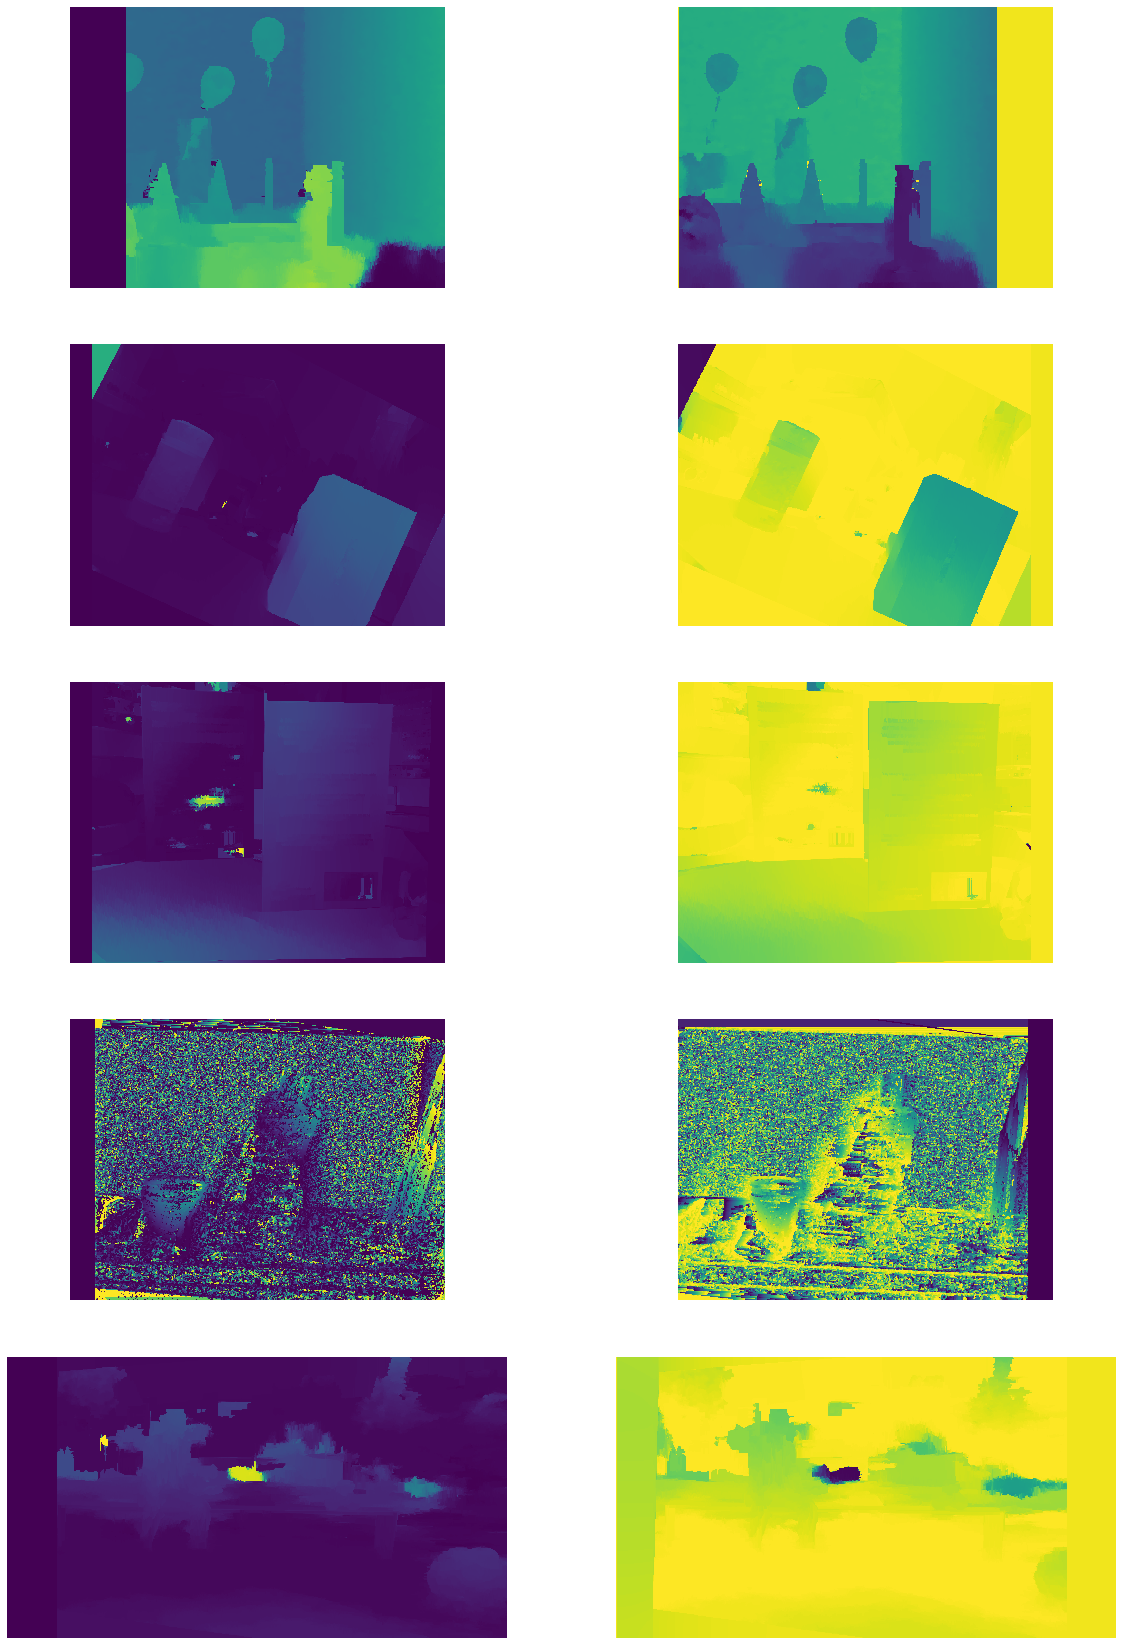

In [3]:
plt.figure(figsize=(20, 30))
n, m = 5, 2
for i in range(1, 6):
    im_left = cv2.imread(f'data/{i}_a.jpg')
    im_right = cv2.imread(f'data/{i}_b.jpg')
    if i != 1: # pair-1 is already rectified
        im_left, im_right = get_rectified_stereo(im_left, im_right)
    # since pair-4 has a textureless backgroud, we disable semiglobal matching
    # use local matching instead, and also disable filtering
    if i == 4:
        displ, dispr = get_disp_map(im_left, im_right, 96, 'bm', False)
    else:
        displ, dispr = get_disp_map(im_left, im_right, 96, filtering=True)
    cv2.imwrite(os.path.join(rect_dir, f'{i}_a_rect.jpg'), im_left)
    cv2.imwrite(os.path.join(rect_dir, f'{i}_b_rect.jpg'), im_right)
    cv2.imwrite(os.path.join(disp_dir, f'{i}_a_disp.jpg'), displ)
    cv2.imwrite(os.path.join(disp_dir, f'{i}_b_disp.jpg'), dispr)
    
    plt.subplot(n, m, i*2-1)
    plt.axis('off')
    plt.imshow(displ)
    plt.subplot(n, m, i*2)
    plt.axis('off')
    plt.imshow(dispr)
    

* semi-global block matching doesn't work well when backgroud is txttureless region (e.g. pair-4 and pair-5, especially pair-4), due to much mismatching.
* some techniuqes may help such cases
    - **foreground segmenation**, so we can exclude textureless backgound from block matching process
    - **deep learning**, which takes semantic feature into consideration. e.g. [GCNet](http://openaccess.thecvf.com/content_ICCV_2017/papers/Kendall_End-To-End_Learning_of_ICCV_2017_paper.pdf)

### B3. relative height estimation

In [this website](https://yangcha.github.io/iview/iview.html), we can get pixel coordinates at the tip of cursor. 

To calulate height of an object, we can use pixel to pixel distance or pixel to plane distance. We choose the first, simpler scheme. In this way, we just need to find two points for each object in image.

In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from stereo_functions import draw_points_and_line, cal_normalized_distance

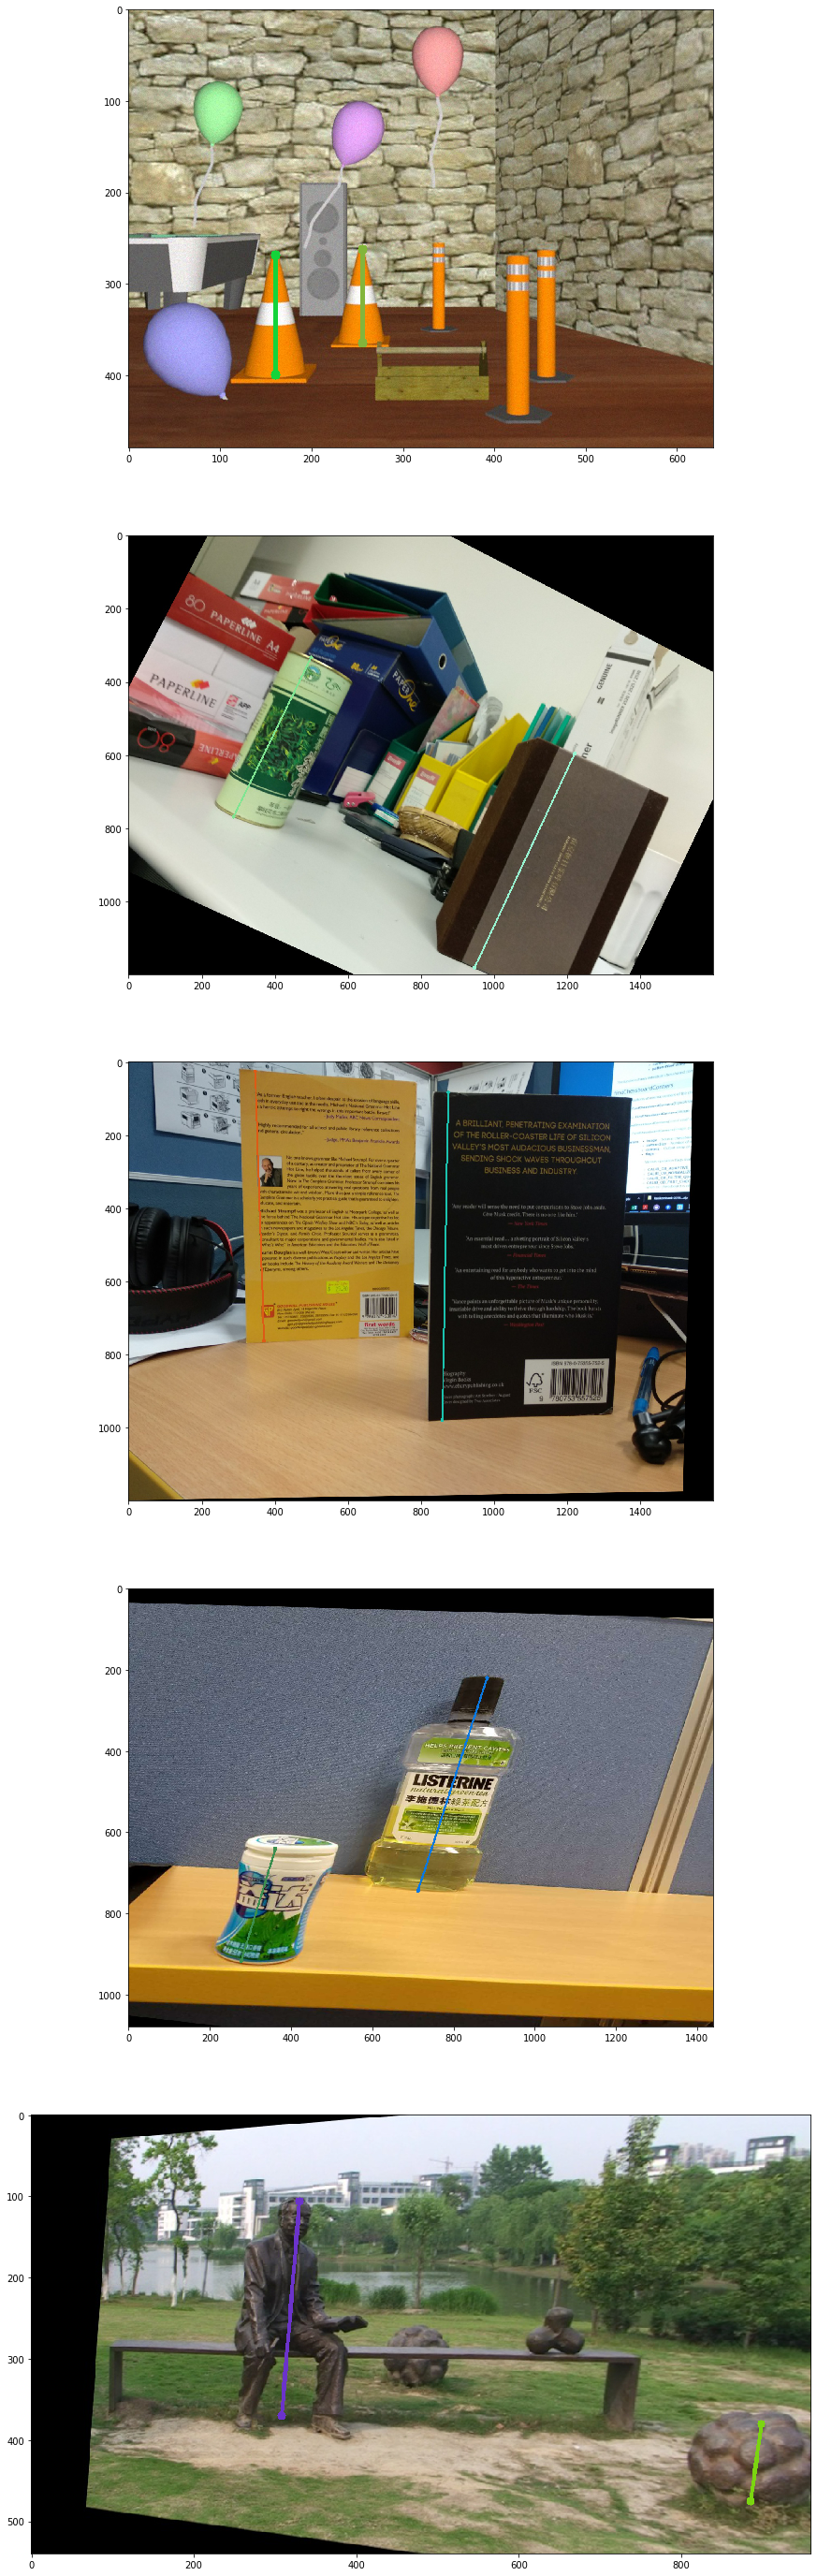

In [7]:
plt.figure(figsize=(20, 50))

for i in range(1, 6):
    pts = pd.read_csv(f'results/points/{i}_a.txt', header=None).to_numpy()
    img =  cv2.imread(f'results/rectified/{i}_a_rect.jpg')
    img = draw_points_and_line(pts[:2], img)
    img = draw_points_and_line(pts[2:4], img)
    plt.subplot(5, 1, i)
    plt.imshow(img[:, :, ::-1])

In [9]:
for i in range(1, 6):
    pts = pd.read_csv(f'results/points/{i}_a.txt', header=None).to_numpy()
    disp = disp = cv2.imread(f'results/normalized_disparity_map/{i}_a_disp.jpg', 0)
    h1 = cal_normalized_distance(disp, pts[0], pts[1])
    h2 = cal_normalized_distance(disp, pts[2], pts[3])
    rel_h = h1 / h2
    print(f'image {i}: relative height = {rel_h:.3f}')

image 1: relative height = 1.022
image 2: relative height = 1.074
image 3: relative height = 1.035
image 4: relative height = 0.802
image 5: relative height = 1.109


Estimated relative heights in image 1 ~ 3 make sense. **However, it looks bad in image 4 and image 5. This is due to the low quality of estimated disparity map (see section B2)**. Here, based on the observation that, two objects in image 4 and 5 are located at similar depth, we assume the actual relative height is same as in the image.  

In [13]:
print('Corrected rough estimation of relative height in image 4 and 5:')
for i in range(4, 6):
    pts = pd.read_csv(f'results/points/{i}_a.txt', header=None).to_numpy()
    h1 = np.linalg.norm(pts[0] - pts[1])
    h2 = np.linalg.norm(pts[2] - pts[3])
    rel_h = h1 / h2
    print(f'image {i}: relative height = {rel_h:.3f}')

Corrected rough estimation of relative height in image 4 and 5:
image 4: relative height = 0.525
image 5: relative height = 2.763


## Reference

1. [Epipolar Geometry - OpenCV Tutorial](https://docs.opencv.org/3.4/da/de9/tutorial_py_epipolar_geometry.html)

2. [Open CV Stereo – Depth image generation and filtering with python 3+, ximgproc and OpenCV 3+](http://timosam.com/python_opencv_depthimage/)

3. [基本矩阵、本质矩阵和单应矩阵](https://blog.csdn.net/kokerf/article/details/72191054)